Here, we want to how level that the electric near field just above cell affected by adjacent cells. In this simulation, we simulated the structure which we called "Alpha structure". After this struture , we will also apply same simulation mehod, factor to the structure , Beta and 2Alpha 1Beta and 2Beta 1 Alpha stucture.

# Set up Structure for Cell height = 600 nm situation
Factors  
PML thickness : 1 micrometer

Cell height : 600 nm

Cell width : 80_150_80 nm

Substract thickness : 1 micrometer

Substract refractive index : 2.6678

y direction symmetry

In [1]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

#sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency


glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml # Whole Enviroment size _ x direction
sy = num_cells*gp  # # Whole Enviroment size _ y direction
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ), # Souce cetenr location
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]



In [2]:
# Set up periodic repeated stucture

for j in range(num_cells):
    geometry.append(
    mp.Block(
        material=glass,
        size=mp.Vector3(gh, gwa, mp.inf),
        center=mp.Vector3(
            -0.5 * sx + dpml + dsub + 0.5 * gh,
            -0.5 * sy + gp/2 + (j * 3 * gp),
            #-0.5 * sy + gp/2,
        ),
    )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp/2 + gp  , 
            ),
        )
    )

for j in range(num_cells):
    geometry.append(
    mp.Block(
        material=glass,
        size=mp.Vector3(gh, gwa, mp.inf),
        center=mp.Vector3(
            -0.5 * sx + dpml + dsub + 0.5 * gh,
            -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
            #-0.5 * sy  + gp/2 + 2*gp ,
        ),
    )
    )


     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.6,0)
          size (0.6,0.15,1e+20)
          a

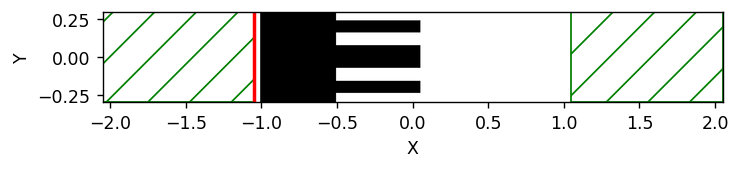

In [3]:
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()


In [4]:
t_xx = (.532) # Air 光速跑完 波長 532 nm 入射光 所需的 meep unit time
dt = (t_xx / 40) # cut 40 sections in a period time
t = 1000 # Total simulation time

x_obs = -0.5 * sx + dpml + dsub + gh + 0.002 # Set up a x coordinate of observed point
# The meaning of down , cen , up are the cordinate in each cell structure. (Reference stucture diagram just show above)
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))


40


-----------
Initializing structure...
time for choose_chunkdivision = 0.000179052 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.6 x 0 with resolution 500
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1

run 0 finished at t = 1000.0 (1000000 timesteps)
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0

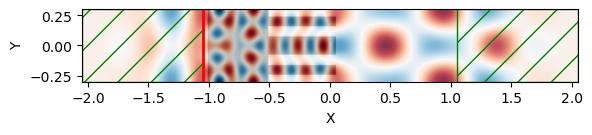

In [5]:

# 儲存場量數值的列表
ez_data_cen = []
ez_data_up = []
ez_data_down = []
###
def get_slice(sim):
    ez_data_cen.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_cen) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_up.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_up) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_down.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_down) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [6]:

ez_data_up = np.array(ez_data_up)
ez_data_cen = np.array(ez_data_cen)
ez_data_down = np.array(ez_data_down)

print(len(ez_data_cen))

print(1 + int(round(t_xx/dt)))


76923
41


In [ ]:
ez_data_cen = np.array(ez_data_cen)
ez_data_up = np.array(ez_data_up)
ez_data_down = np.array(ez_data_down)

#plt.subplot_adjust(hspace = .35)
plt.figure(dpi = 200)
start = round(len(ez_data_cen) / t *1)

for i in range(start,len(ez_data_cen),1):
    plt.subplot(3,1,1)
    plt.plot(i,ez_data_up[i],'k.')
    plt.subplot(3,1,2)
    plt.plot(i,ez_data_cen[i],'k.')
    plt.subplot(3,1,3)
    plt.plot(i,ez_data_down[i],'k.')
    if i ==  (len(ez_data_cen)-1):
        plt.subplot(3,1,1)
        plt.title('upper point')
        plt.ylabel('Electrical field amplitude')
        plt.xlabel('time (dt/point)')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_up[i],'b .')
        plt.subplot(3,1,2)
        plt.title('center point')
        plt.ylabel('Electrical field amplitude')
        plt.xlabel('time (dt/point)')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_cen[i],'b .')
        plt.subplot(3,1,3)
        plt.title('downer point')
        plt.ylabel('Electrical field amplitude')
        plt.xlabel('time (dt/point)')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_down[i],'b .')


/home/henry/miniconda3/envs/mp/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [ ]:
# index1 and index2 . When we find the target's Electric field amplitude, we want to know where is amplitude value in array. So we set up index variable before running simulation.
index1_up = 0
index1_cen = 0
index1_down = 0

index2_up = 0
index2_cen = 0
index2_down = 0

# Period_max , period_next_mat . I set up those variables because I plan to use variables to store max amplitude value in a peiod in the following simulation. 
period_max_up = 0
period_max_cen = 0
period_max_down = 0
period_next_max_up = 0
period_next_max_cen = 0
period_next_max_down = 0

# Intial_index , end_index. ==>  "for loop" index
initial_index = round(len(ez_data_cen) / t * 200 )
print(initial_index)

end_index = len(ez_data_cen) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

In [ ]:

for i in range( initial_index , end_index , 1 + round(t_xx/dt) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_up[j])
        period_next.append(ez_data_up[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_up == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_up == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('upper point 到達誤差範圍內的所需 meep time unit' , 38944 / len(ez_data_up) * 500 , '\n')
        print('------------------------------------------------------')
        break


for i in range( initial_index , end_index , 1 + round(t_xx/dt) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_cen[j])
        period_next.append(ez_data_cen[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_cen == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_cen == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('center point 到達誤差範圍內的所需 meep time unit' , 38944 / len(ez_data_cen) * 500 , '\n')
        print('-----------------------------------------------------')
        break
        

for i in range( initial_index , end_index , 1 + round(t_xx/dt) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_down[j])
        period_next.append(ez_data_down[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- down point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------down point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_down == period_max)
        print(index1, '--- down point index1')
        index2 = np.where(ez_data_down == period_next_max)
        print(index2, '--- down point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('down point 到達誤差範圍內的所需 meep time unit' , 38944 / len(ez_data_down) * 500 , '\n')
        print('---------------------------------------------------')
        break


dt_ = str(dt)
    

In [ ]:
plt.figure(dpi = 150)
plt.title('Upper point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(38905 , 38944) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_up[i] , 'b.')

In [ ]:
plt.figure(dpi = 150)
plt.title('center point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_cen[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_cen[i] , 'b.')
    if max_value < ez_data_cen[i] :
        max_value = ez_data_cen[i]

print(max_value)

In [ ]:
plt.figure(dpi = 150)
plt.title('downnerr point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_down[i] , 'b.')

# Phase for Cell height = 600nm

In [ ]:
t_xx = (.532)
dt = (t_xx / 40)
t = 1000
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))


# Following is Simulation that Cell height = 300 nm

In [ ]:

sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3  # number of grating unit cells

# air region thickness adjacent to grating
dair = 1

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency


glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = num_cells*gp
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [ ]:
for j in range(num_cells):
    geometry.append(
    mp.Block(
        material=glass,
        size=mp.Vector3(gh, gwa, mp.inf),
        center=mp.Vector3(
            -0.5 * sx + dpml + dsub + 0.5 * gh,
            -0.5 * sy + gp/2 + (j * 3 * gp),
            #-0.5 * sy + gp/2,
        ),
    )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp/2 + gp  , 
            ),
        )
    )

for j in range(num_cells):
    geometry.append(
    mp.Block(
        material=glass,
        size=mp.Vector3(gh, gwa, mp.inf),
        center=mp.Vector3(
            -0.5 * sx + dpml + dsub + 0.5 * gh,
            -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
            #-0.5 * sy  + gp/2 + 2*gp ,
        ),
    )
    )


In [ ]:
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()


In [ ]:
t_xx = (.532)
dt = (t_xx / 40)
t = 1000
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))


In [ ]:
# 儲存場量數值的列表
ez_data_cen = []
ez_data_up = []
ez_data_down = []
###
def get_slice(sim):
    ez_data_cen.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_cen) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_up.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_up) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_down.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_down) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()


In [ ]:

ez_data_up = np.array(ez_data_up)
ez_data_cen = np.array(ez_data_cen)
ez_data_down = np.array(ez_data_down)

print(len(ez_data_cen))

print(1 + int(round(t_xx/dt)))


In [ ]:
ez_data_cen = np.array(ez_data_cen)
ez_data_up = np.array(ez_data_up)
ez_data_down = np.array(ez_data_down)

#plt.subplot_adjust(hspace = .35)
plt.figure(dpi = 200)
start = round(len(ez_data_cen) / t *1)

for i in range(start,len(ez_data_cen),1):
    plt.subplot(3,1,1)
    plt.plot(i,ez_data_up[i],'k.')
    plt.subplot(3,1,2)
    plt.plot(i,ez_data_cen[i],'k.')
    plt.subplot(3,1,3)
    plt.plot(i,ez_data_down[i],'k.')
    if i ==  (len(ez_data_cen)-1):
        plt.subplot(3,1,1)
        plt.title('upper point')
        plt.xlabel('time point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_up[i],'b .')
        plt.subplot(3,1,2)
        plt.title('center point')
        plt.xlabel('time point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_cen[i],'b .')
        plt.subplot(3,1,3)
        plt.title('downer point')
        plt.xlabel('time point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_down[i],'b .')


In [ ]:
# index1 and index2 . When we find the target's Electric field amplitude, we want to know where is amplitude value in array. So we set up index variable before running simulation.
index1_up = 0
index1_cen = 0
index1_down = 0

index2_up = 0
index2_cen = 0
index2_down = 0

# Period_max , period_next_mat . I set up those variables because I plan to use variables to store max amplitude value in a peiod in the following simulation. 
period_max_up = 0
period_max_cen = 0
period_max_down = 0
period_next_max_up = 0
period_next_max_cen = 0
period_next_max_down = 0

# Intial_index , end_index. ==>  "for loop" index
initial_index = round(len(ez_data_cen) / t * 200 )
print(initial_index)

end_index = len(ez_data_cen) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

In [ ]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_up[j])
        period_next.append(ez_data_up[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_up == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_up == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('upper point 到達誤差範圍內的所需 meep time unit' , 31396 / len(ez_data_up) * 500 , '\n')
        print('------------------------------------------------------')
        break


for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_cen[j])
        period_next.append(ez_data_cen[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_cen == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_cen == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('center point 到達誤差範圍內的所需 meep time unit' , 43326 / len(ez_data_cen) * 500 , '\n')
        print('-----------------------------------------------------')
        break
        

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_down[j])
        period_next.append(ez_data_down[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- down point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '-------down point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '-----振幅誤差')
        index1 = np.where(ez_data_down == period_max)
        print(index1, '--- down point index1')
        index2 = np.where(ez_data_down == period_next_max)
        print(index2, '--- down point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' , index1  , '\t' ,  index2 ,'\n\n' )
        print('down point 到達誤差範圍內的所需 meep time unit' , 38944 / len(ez_data_down) * 500 , '\n')
        print('---------------------------------------------------')
        print((period_max + period_next_max)/2,'\t Average')
        break



dt_ = str(dt)
    

In [ ]:
plt.figure(dpi = 150)
plt.title('Upper point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_up[i] , 'b.')

In [ ]:
plt.figure(dpi = 150)
plt.title('center point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_cen[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_cen[i] , 'b.')
    if max_value < ez_data_cen[i] :
        max_value = ez_data_cen[i]

print(max_value)

In [ ]:
plt.figure(dpi = 150)
plt.title('downnerr point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_down[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_down[i] , 'b.')
    if max_value < ez_data_down[i] :
        max_value = ez_data_down[i]

print(max_value)

In [ ]:
'''ez_data_1period_up = []
ez_data_1period_cen = []
ez_data_1period_down = []

for i in range(len(ez_data_up) - int(t_xx/dt)-4 , len(ez_data_up)):
    ez_data_1period_up.append(ez_data_up[i])
#print(ez_data_1period)

ez_data_1period_up_ = []
for i in range(len(ez_data_1period_up)):
    ez_data_1period_up_.append(ez_data_1period_up[i])
    plt.plot(i,ez_data_1period_up_[i],'b.')
###
for i in range(len(ez_data_cen) - int(t_xx/dt)-4 , len(ez_data_cen)):
    ez_data_1period_cen.append(ez_data_cen[i])
#print(ez_data_1period)

ez_data_1period_cen_ = []
for i in range(len(ez_data_1period_cen)):
    ez_data_1period_cen_.append(ez_data_1period_cen[i])
    plt.plot(i,ez_data_1period_cen_[i],'b.')
###
for i in range(len(ez_data_down) - int(t_xx/dt)-4 , len(ez_data_down)):
    ez_data_1period_down.append(ez_data_down[i])
#print(ez_data_1period)

ez_data_1period_down_ = []
for i in range(len(ez_data_1period_down)):
    ez_data_1period_down_.append(ez_data_1period_down[i])
    plt.plot(i,ez_data_1period_down_[i],'b.')
    
###
ma_x = max(ez_data_1period_)
mi_n = min(ez_data_1period_)
print((ma_x - mi_n)/2.0)
'''

In [ ]:
'''# 儲存擷取的電場振福數值
extracted_amplitudes = []

for j in range(int(sy / 0.002)):
    y_obs = y_obs_start + (j * 0.002)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round(x_obs * resolution))
    y_index = int(round(y_obs * resolution))
    
    # 檢查索引是否在範圍內
    if 0 <= x_index < len(ez_data_list) and 0 <= y_index < len(ez_data_list[0]):
        # 取得振幅資訊
        extracted_amplitudes.append(np.abs(ez_data_list[x_index][y_index]))
    else:
        extracted_amplitudes.append(0)  # 或者使用其他值來代表無效的索引

# 將擷取的電場振福數值作圖
plt.figure()
plt.plot(np.arange(len(extracted_amplitudes)), extracted_amplitudes)
plt.xlabel('Sample Points')
plt.ylabel('Electric Field Amplitude')
plt.title('Electric Field Amplitude Along y-direction')
plt.show()

'''

In [17]:
'''# 儲存振福資訊的列表，定義為擁有 10 列的空二維陣列
ez_amplitude_list = [[] for _ in range(int(round(t/dt)))]

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy

for i in range(0, int(round(t / dt))):
    amplitude = []
    for j in range(int(sy / 0.002)):
        y_obs = y_obs_start + (j * 0.002)
        # 計算觀測點在陣列中的索引位置
        x_index = int(round(x_obs * sim.resolution))
        y_index = int(round(y_obs * sim.resolution))
        
        # 取得振幅資訊
        amplitude.append(np.abs(ez_data_list[x_index][y_index]))
        
        # 將振幅資訊加入到對應時間步長的列表中
        ez_amplitude_list[i].append(amplitude)
    
for i in range(0, int(round(t / dt))):
    print(ez_amplitude_list[i])
    '''

IndexError: list index out of range

In [16]:
'''# 這裡的 Code 單個觀測點 電場E - 時間t 的點狀圖

# 儲存振福資訊的列表，定義為擁有 10 列的空二維陣列
ez_amplitude_list = [[] for _ in range(int(round(t/dt)))]

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy #+ gp/2
#y_obs = y_obs_start


for i in range(0,int(round(t / dt))):
    amplitude = []
    for j in range(int(sy / 0.002)):
        y_obs = y_obs_start + (j * 0.002)
        # 計算觀測點在陣列中的索引位置
        x_index = int(round(x_obs * sim.resolution))
        y_index = int(round(y_obs * sim.resolution))
        print(x_index,y_index)
        # 取得振幅資訊
        amplitude.append(np.abs(ez_data_list[x_index][y_index]))
        # 將振幅資訊加入到對應時間步長的列表中
        ez_amplitude_list[i].append(amplitude)

    
for i in range(0, int(round(t / dt))):
    print(ez_amplitude_list[i])
    '''

26 -150


IndexError: list index out of range

10
-----------
Initializing structure...
time for choose_chunkdivision = 0.000178099 s
Working in 2D dimensions.
Computational cell is 3.8 x 0.6 x 0 with resolution 500
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (

run 39 finished at t = 410.39300000000003 (410393 timesteps)
     block, center = (-0.61,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.3,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.3,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, cente

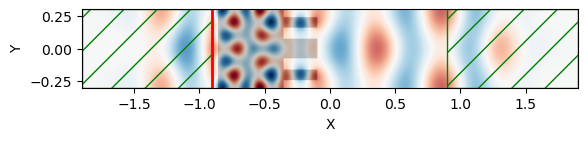

In [20]:
'''# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列


# 遍歷每個時間步長，並檢查是否在指定的時間範圍內
t = time_start
for i in range(0 , int((time_end - time_start) / dt)):
    print(t)
    sim.run(until=t)
    # 取得 Ez 場量數值，並加入到對應的列表中
    ez_data_list[i].append(np.array(sim.get_array(component=mp.Ez, cmplx=True)))
    t = t + dt

# 將每一個列表轉換為 NumPy 數組
'''for i in range(0,int((time_end - time_start) / dt)):
    ez_data_list[i] = np.array(ez_data_list[i])
'''
plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()
'''

In [12]:
# 這裡的 Code 單個觀測點 電場E - 時間t 的點狀圖

# 儲存振福資訊的列表，定義為擁有 10 列的空二維陣列
ez_amplitude_list = [[] for _ in range(int((time_end - time_start) / dt))]

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy #+ gp/2
y_obs = y_obs_start

for i in range(0, int((time_end - time_start) / dt)):
    for j in range(300):
        y_obs = y_obs_start + (j * 0.002)
        # 計算觀測點在陣列中的索引位置
        x_index = int(round(x_obs * sim.resolution))
        y_index = int(round(y_obs * sim.resolution))
        # 取得振幅資訊
        amplitude = np.abs(ez_data_list[i][0][x_index, y_index])
        # 將振幅資訊加入到對應時間步長的列表中
        ez_amplitude_list[i].append(amplitude)

    
for i in range(0, int((time_end - time_start) / dt)):
    print(ez_amplitude_list[i])
    

'''sim.run(until = 100)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()
'''

NameError: name 'ez_data_list' is not defined

[0.6890663527475407, 0.6887059150137753, 0.6880815423953489, 0.6871608637108948, 0.6858963192278242, 0.684238688873049, 0.6821538189613102, 0.6796376506572595, 0.6767239010977864, 0.6734801831361501, 0.6699918864092397, 0.6663376805793259, 0.6625642764473696, 0.6586693769245257, 0.654599682566414, 0.6502658247654696, 0.6455699030165917, 0.6404362898149809, 0.6348346428116589, 0.6287865438513007, 0.6223531289854543, 0.6156082926546139, 0.6086077264006406, 0.6013658710575116, 0.593849974227218, 0.5859938741629727, 0.57772641063023, 0.5690035468329703, 0.5598317172243876, 0.5502732599504618, 0.5404317429112502, 0.530422778971859, 0.5203414325811995, 0.510238354673144, 0.5001129757782004, 0.4899250445736053, 0.4796184392127338, 0.4691465261312928, 0.4584882739228297, 0.4476488042782019, 0.4366451358828588, 0.42548452702099077, 0.41414621227128134, 0.40257600069456106, 0.39069769375121843, 0.37843790121101784, 0.36575470246424946, 0.35265834211487823, 0.3392147869912619, 0.32552949598243536

In [26]:

# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01
y_obs_start = -0.5 * sy + gp/2 

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(num_cells):
    y_obs = y_obs_start + (j * gp)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs) * sim.resolution))
    y_index = int(round((y_obs) * sim.resolution))
    # 取得相位資訊
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

# 印出觀測點的相位資訊
'''
for j, phase in enumerate(phase_list):
    print(f"觀測點 {j+1} 的相位資訊: {phase}")'''
    
print(phase_list)

[2.3077927447350057, 0.0, -2.307792744735097]


In [6]:
sim.reset_meep()
f = plt.figure(dpi = 100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 50)
plt.close()

filename = "1 alpha beta alpha structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000115156 s
Working in 2D dimensions.
Computational cell is 17.1 x 6 x 0 with resolution 50
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.9,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.3,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.7,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (

     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.9,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.3,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.7,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.5,0)
          size (0.6,0.08,1e+20)
          axes